In [1]:
import pandas as pd
import os 

In [2]:
path= os.getcwd().split('/')
i=path.index('Alignment-of-schema-only-and-instance-only-data')
folder_path= "/".join(path[:i+1])

llama=pd.read_csv(folder_path+"/Results_Experiments/llama_results/llama_with_time.csv")
gpt=pd.read_csv(folder_path+"/Results_Experiments/GPT_results/gpt_with_time.csv")

## GPT

In [3]:
gpt.columns

Index(['Category', 'Relation', 'Dataset', 'models', 'f1_score', 'Precision',
       'Recall', 'Execution_Time', 'Model', 'Dataset Name', 'noise',
       'models_y', 'Relation Type', 'Relation_binaire',
       'Source 1 Attribute Count', 'Source 2 Attribute Count',
       'Common Attribute Count', 'pourcentage_commun', 'Precision Median',
       'Recall Median', 'F1 Score Median', 'ngcd_at_median',
       'Precision (Top n%)', 'Recall (Top n%)', 'F1 Score (Top n%)',
       'ngcd_at_n', 'Precision (Top 2n%)', 'Recall (Top 2n%)',
       'F1 Score (Top 2n%)', 'ngcd_at_2n', 'F1 Score (Top 25)', 'ngcd_at_25',
       'F1 Score (Top 20)', 'ngcd_at_20', 'F1 Score (Top 15)', 'ngcd_at_15',
       'F1 Score (Top 10)', 'ngcd_at_10', 'F1 Score (Top 7)', 'ngcd_at_7',
       'F1 Score (Top 5)', 'ngcd_at_5', 'Execution_Time_y'],
      dtype='object')

In [4]:
# Group by noise and calculate mean
metrics_by_noise = gpt.groupby('noise', as_index=False).agg({
    'f1_score': 'mean',
    'ngcd_at_median': 'mean'
})
metrics_by_noise

,noise,f1_score,ngcd_at_median
0,1,0.569097,0.730981
1,2,0.529604,0.700262
2,3,0.536144,0.706846
3,4,0.529859,0.713810
4,5,0.535041,0.725619
5,6,0.527895,0.706310


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_35551/2147516901.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_35551/2147516901.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


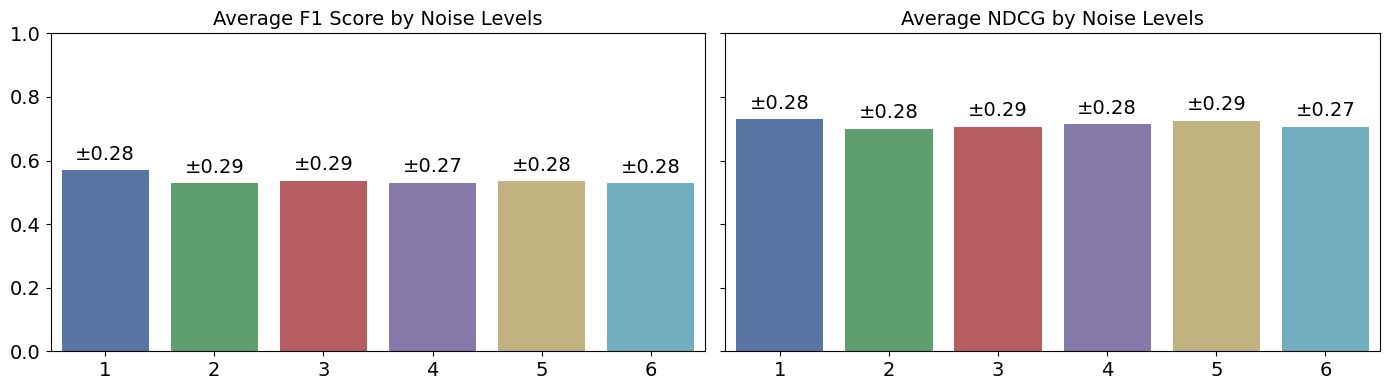

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `metrics_by_noise` is already computed with mean and standard deviation

# Adding standard deviation to the dataframe for display (example values for illustration)
metrics_by_noise['F1_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values
metrics_by_noise['NDCG_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Define the color palette (shared between plots)
palette = [
    "#4C72B0",  # Soft Navy Blue
    "#55A868",  # Gentle Green
    '#C44E52',  # Muted Red
    "#8172B2",  # Soft Purple
    "#CCB974",  # Soft Gold
    "#64B5CD"   # Soft Teal
]

# Plot F1 Score barplot
sns.barplot(
    data=metrics_by_noise,
    x='noise',
    y='f1_score',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Average F1 Score by Noise Levels", fontsize=14)
axes[0].set_xlabel("", fontsize=12)
axes[0].set_ylabel("", fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_ylim(0,1)

# Add standard deviation values above the bars (F1 Score)
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['F1_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Plot NDCG barplot
sns.barplot(
    data=metrics_by_noise,
    x='noise',
    y='ngcd_at_median',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Average NDCG by Noise Levels", fontsize=14)
axes[1].set_xlabel("", fontsize=12)
axes[1].set_ylabel("", fontsize=12)  # Shared Y-axis label is on the first plot
axes[1].tick_params(labelsize=14)
axes[1].set_ylim(0,1)

# Add standard deviation values above the bars (NDCG)
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['NDCG_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.savefig("noise_gpt.png")
plt.show()


## Llama

In [6]:
llama.columns

Index(['Category', 'Relation', 'Dataset', 'models', 'f1_score', 'Precision',
       'Recall', 'Execution_Time', 'Model', 'models_y', 'f1_score_y',
       'Precision_y', 'Recall_y', 'Noise_Level', 'Attributes_Source1',
       'Attributes_Source2', 'Common_Attributes', 'pourcentage_commun',
       'Relation_binaire', 'F1 Score Median', 'NDCG at Median', 'Dataset.1',
       'Model.1', 'Category.1', 'Relation.1', 'models.1', 'f1_score.1',
       'Precision.1', 'Recall.1', 'Execution_Time_y', 'Noise_Level.1',
       'Attributes_Source1.1', 'Attributes_Source2.1', 'Common_Attributes.1',
       'pourcentage_commun.1', 'Relation_binaire.1', 'F1 Score Median.1',
       'NDCG at Median.1'],
      dtype='object')

In [8]:
# Group by noise and calculate mean
metrics_by_noise = llama.groupby('Noise_Level', as_index=False).agg({
    'f1_score': 'mean',
    'NDCG at Median': 'mean'
})
metrics_by_noise

,Noise_Level,f1_score,NDCG at Median
0,1,0.487987,0.633679
1,2,0.463693,0.603657
2,3,0.433749,0.612779
3,4,0.449255,0.623702
4,5,0.452526,0.615272
5,6,0.465878,0.607905


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_35551/718824608.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_35551/718824608.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


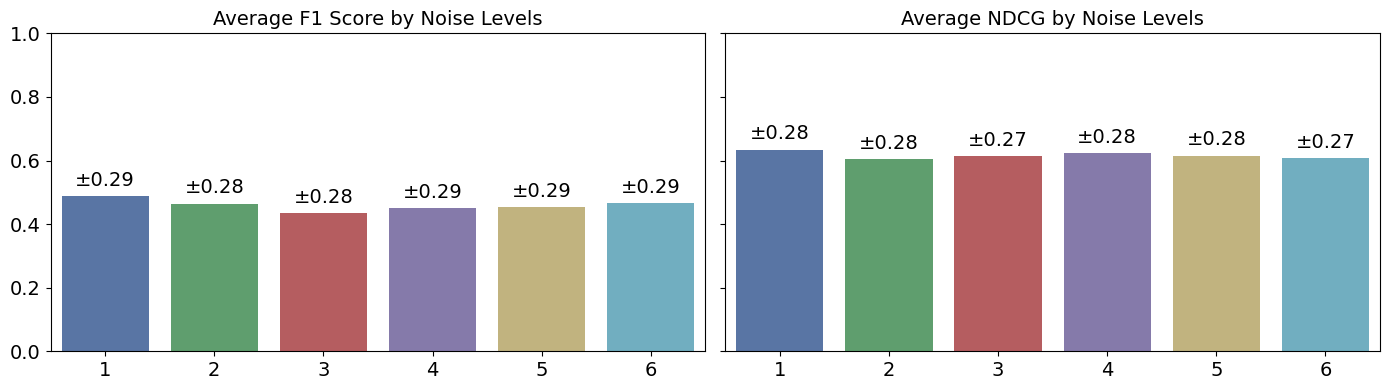

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `metrics_by_noise` is already computed with mean and standard deviation

# Adding standard deviation to the dataframe for display (example values for illustration)
metrics_by_noise['F1_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values
metrics_by_noise['NDCG_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Define the color palette (shared between plots)
palette = [
    "#4C72B0",  # Soft Navy Blue
    "#55A868",  # Gentle Green
    '#C44E52',  # Muted Red
    "#8172B2",  # Soft Purple
    "#CCB974",  # Soft Gold
    "#64B5CD"   # Soft Teal
]

# Plot F1 Score barplot
sns.barplot(
    data=metrics_by_noise,
    x='Noise_Level',
    y='f1_score',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Average F1 Score by Noise Levels", fontsize=14)
axes[0].set_xlabel("", fontsize=12)
axes[0].set_ylabel("", fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_ylim(0,1)

# Add standard deviation values above the bars (F1 Score)
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['F1_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Plot NDCG barplot
sns.barplot(
    data=metrics_by_noise,
    x='Noise_Level',
    y='NDCG at Median',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Average NDCG by Noise Levels", fontsize=14)
axes[1].set_xlabel("", fontsize=12)
axes[1].set_ylabel("", fontsize=12)  # Shared Y-axis label is on the first plot
axes[1].tick_params(labelsize=14)
axes[1].set_ylim(0,1)

# Add standard deviation values above the bars (NDCG)
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['NDCG_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.savefig("noise_llama.png")
plt.show()
